<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.081395,53.063713,37.630168,0.005030,162.780306,162.774840,0.005466
1,0.0,1.0,53.743400,99.248006,20.597103,-0.000650,183.587859,183.590313,-0.002455
2,0.0,2.0,72.373108,86.915515,97.538898,0.001390,266.828911,266.827988,0.000924
3,0.0,3.0,24.902405,93.273355,91.487481,0.000875,219.664116,219.664688,-0.000572
4,0.0,4.0,67.855224,39.453302,68.375833,-0.006340,185.678019,185.683035,-0.005016
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,36.351499,62.215570,54.061909,0.000559,162.629537,162.630539,-0.001002
29996,999.0,26.0,59.293374,92.730859,81.212402,-0.000106,243.236528,243.235129,0.001400
29997,999.0,27.0,95.909435,30.695029,36.129796,0.012311,172.746571,172.739355,0.007216
29998,999.0,28.0,45.914929,93.827728,37.346024,-0.000858,187.087823,187.089579,-0.001756


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.081395,53.063713,37.630168,0.005030,162.780306,162.774840,0.005466
1,0.0,1.0,53.743400,99.248006,20.597103,-0.000650,183.587859,183.590313,-0.002455
2,0.0,2.0,72.373108,86.915515,97.538898,0.001390,266.828911,266.827988,0.000924
3,0.0,3.0,24.902405,93.273355,91.487481,0.000875,219.664116,219.664688,-0.000572
4,0.0,4.0,67.855224,39.453302,68.375833,-0.006340,185.678019,185.683035,-0.005016
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,36.351499,62.215570,54.061909,0.000559,162.629537,162.630539,-0.001002
29996,999.0,26.0,59.293374,92.730859,81.212402,-0.000106,243.236528,243.235129,0.001400
29997,999.0,27.0,95.909435,30.695029,36.129796,0.012311,172.746571,172.739355,0.007216
29998,999.0,28.0,45.914929,93.827728,37.346024,-0.000858,187.087823,187.089579,-0.001756


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    62.081395  53.063713  37.630168  0.005030  162.780306   
      1.0    53.743400  99.248006  20.597103 -0.000650  183.587859   
      2.0    72.373108  86.915515  97.538898  0.001390  266.828911   
      3.0    24.902405  93.273355  91.487481  0.000875  219.664116   
      4.0    67.855224  39.453302  68.375833 -0.006340  185.678019   
...                ...        ...        ...       ...         ...   
999.0 25.0   36.351499  62.215570  54.061909  0.000559  162.629537   
      26.0   59.293374  92.730859  81.212402 -0.000106  243.236528   
      27.0   95.909435  30.695029  36.129796  0.012311  172.746571   
      28.0   45.914929  93.827728  37.346024 -0.000858  187.087823   
      29.0   57.305383  94.222405  66.344531 -0.001556  227.870763   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    162.774840  0.005466  
      1.0    183.590313 -0.002455  
      2.0    266.827988  0.000924  
      3.0    219.664688 -0.000572  
      4.0    185.683035 -0.005016  
...                 ...       ...  
999.0 25.0   162.630539 -0.001002  
      26.0   243.235129  0.001400  
      27.0   172.739355  0.007216  
      28.0   187.089579 -0.001756  
      29.0   227.871595 -0.000832  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    62.081395  53.063713  37.630168  0.005030  162.780306   
      1.0    53.743400  99.248006  20.597103 -0.000650  183.587859   
      2.0    72.373108  86.915515  97.538898  0.001390  266.828911   
      3.0    24.902405  93.273355  91.487481  0.000875  219.664116   
      4.0    67.855224  39.453302  68.375833 -0.006340  185.678019   
...                ...        ...        ...       ...         ...   
999.0 25.0   36.351499  62.215570  54.061909  0.000559  162.629537   
      26.0   59.293374  92.730859  81.212402 -0.000106  243.236528   
      27.0   95.909435  30.695029  36.129796  0.012311  172.746571   
      28.0   45.914929  93.827728  37.346024 -0.000858  187.087823   
      29.0   57.305383  94.222405  66.344531 -0.001556  227.870763   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    162.774840  0.005466  
      1.0    183.590313 -0.002455  
      2.0    266.827988  0.000924  
      3.0    219.664688 -0.000572  
      4.0    185.683035 -0.005016  
...                 ...       ...  
999.0 25.0   162.630539 -0.001002  
      26.0   243.235129  0.001400  
      27.0   172.739355  0.007216  
      28.0   187.089579 -0.001756  
      29.0   227.871595 -0.000832  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.081395,53.063713,37.630168,0.005030,162.780306,162.774840,0.005466
1,0.0,1.0,53.743400,99.248006,20.597103,-0.000650,183.587859,183.590313,-0.002455
2,0.0,2.0,72.373108,86.915515,97.538898,0.001390,266.828911,266.827988,0.000924
3,0.0,3.0,24.902405,93.273355,91.487481,0.000875,219.664116,219.664688,-0.000572
4,0.0,4.0,67.855224,39.453302,68.375833,-0.006340,185.678019,185.683035,-0.005016
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,36.351499,62.215570,54.061909,0.000559,162.629537,162.630539,-0.001002
29996,999.0,26.0,59.293374,92.730859,81.212402,-0.000106,243.236528,243.235129,0.001400
29997,999.0,27.0,95.909435,30.695029,36.129796,0.012311,172.746571,172.739355,0.007216
29998,999.0,28.0,45.914929,93.827728,37.346024,-0.000858,187.087823,187.089579,-0.001756


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    62.081395  53.063713  37.630168  0.005030  162.780306   
      1.0    53.743400  99.248006  20.597103 -0.000650  183.587859   
      2.0    72.373108  86.915515  97.538898  0.001390  266.828911   
      3.0    24.902405  93.273355  91.487481  0.000875  219.664116   
      4.0    67.855224  39.453302  68.375833 -0.006340  185.678019   
...                ...        ...        ...       ...         ...   
999.0 25.0   36.351499  62.215570  54.061909  0.000559  162.629537   
      26.0   59.293374  92.730859  81.212402 -0.000106  243.236528   
      27.0   95.909435  30.695029  36.129796  0.012311  172.746571   
      28.0   45.914929  93.827728  37.346024 -0.000858  187.087823   
      29.0   57.305383  94.222405  66.344531 -0.001556  227.870763   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    162.774840  0.005466  
      1.0    183.590313 -0.002455  
      2.0    266.827988  0.000924  
      3.0    219.664688 -0.000572  
      4.0    185.683035 -0.005016  
...                 ...       ...  
999.0 25.0   162.630539 -0.001002  
      26.0   243.235129  0.001400  
      27.0   172.739355  0.007216  
      28.0   187.089579 -0.001756  
      29.0   227.871595 -0.000832  

[30000 rows x 7 columns]

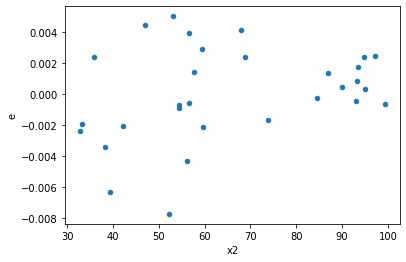

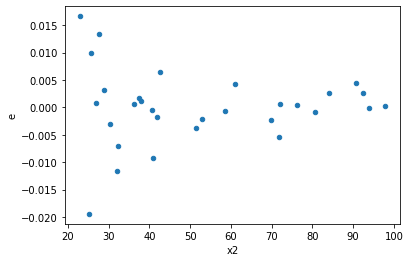

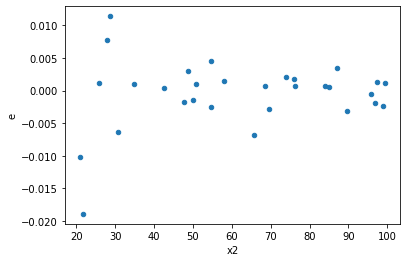

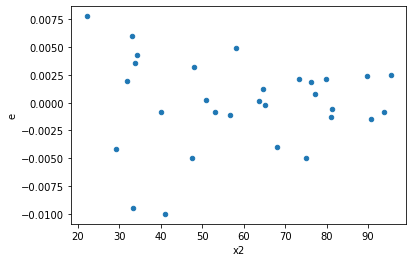

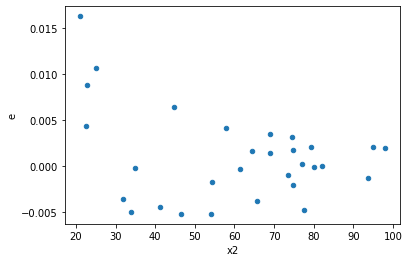

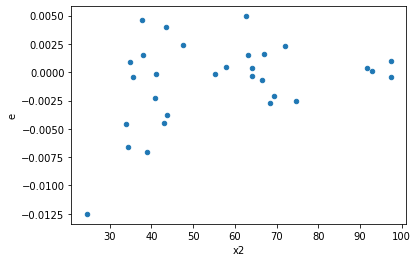

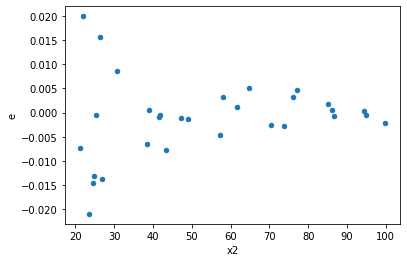

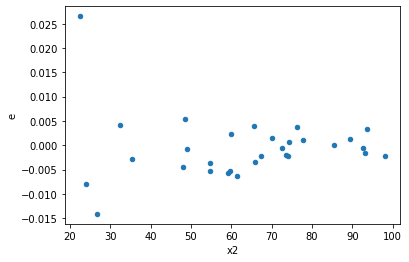

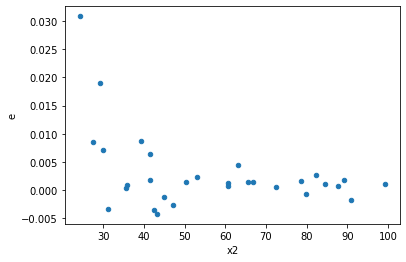

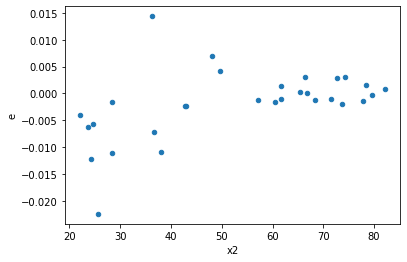

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,9.0,9.0,7.913784201957365e-05,0.00010640846640607757,8.793093557730406e-06,1.1823162934008618e-05,1.34459651274998,0.6662971010090477,0.6668514494954761,0.33314855050452385,Reject001=1 : Homoscedasticity
24.0,9.0,9.0,0.00015818712436939432,0.00022664138165043643,1.7576347152154925e-05,2.518237573893738e-05,1.4327422826221277,0.6007821702036118,0.6996089148981941,0.3003910851018059,Reject001=1 : Homoscedasticity
27.0,9.0,9.0,0.00015153092190391953,0.00027140550856642195,1.6836769100435505e-05,3.0156167618491326e-05,1.7910899317204094,0.39833372006323353,0.8008331399683832,0.19916686003161677,Reject001=1 : Homoscedasticity
42.0,9.0,9.0,0.00015005189977165058,0.00020823128757912264,1.6672433307961176e-05,2.3136809731013628e-05,1.3877284319359477,0.6333391011649936,0.6833304494175032,0.3166695505824968,Reject001=1 : Homoscedasticity
67.0,9.0,9.0,0.0002036726766627486,0.00021698756089266977,2.2630297406972068e-05,2.410972898807442e-05,1.065373934531084,0.9263927758471466,0.5368036120764267,0.4631963879235733,Reject001=1 : Homoscedasticity
73.0,9.0,9.0,0.0004326211113574585,0.0006824185020015094,4.8069012373050945e-05,7.582427800016771e-05,1.5774045327105009,0.507831997522209,0.7460840012388955,0.2539159987611045,Reject001=1 : Homoscedasticity
97.0,9.0,9.0,0.00021419936896528992,0.00036042527804687615,2.3799929885032212e-05,4.0047253116319575e-05,1.6826626510990401,0.4501717782103627,0.7749141108948187,0.22508588910518135,Reject001=1 : Homoscedasticity
113.0,9.0,9.0,7.253499192718302e-05,0.00019171878064422495,8.05944354746478e-06,2.1302086738247217e-05,2.643121279129514,0.1638222783146508,0.9180888608426746,0.0819111391573254,Reject001=1 : Homoscedasticity
121.0,9.0,9.0,0.0005011606006223618,0.0005805544833905498,5.568451118026242e-05,6.450605371006108e-05,1.1584200407406195,0.830187682069023,0.5849061589654885,0.4150938410345115,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,9.57545502277104e-05,4.086044037750301e-05,1.0639394469745601e-05,4.540048930833668e-06,0.4267206130709641,0.2205783520485916,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,0.0002632482931333315,0.00010805557327439598,2.9249810348147946e-05,1.200617480826622e-05,0.41047017622890103,0.2008256702560708,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,0.0006485072955475586,1.3256277942542967e-05,7.205636617195096e-05,1.472919771393663e-06,0.0204412163649604,2.8489366416026476e-06,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,0.0002533827523145494,5.39414620473032e-05,2.815363914606104e-05,5.993495783033689e-06,0.21288529528774028,0.030741624713583243,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.00013441837767978388,5.364531031625694e-05,1.4935375297753764e-05,5.96059003513966e-06,0.3990920828106753,0.1873950266212423,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,7.913784201957365e-05,0.00010640846640607757,8.793093557730406e-06,1.1823162934008618e-05,1.34459651274998,0.6662971010090477,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.0007858544881620366,0.00014497968839552377,8.73171653513374e-05,1.6108854266169307e-05,0.18448668370477025,0.01915160113745788,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,0.00021548113056277175,5.668328603038082e-05,2.394234784030797e-05,6.298142892264535e-06,0.26305452306817384,0.05952299862653321,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.00040495280722870557,6.920660689449867e-05,4.499475635874506e-05,7.689622988277631e-06,0.17090042508437978,0.014755589122151828,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      642
Reject001=0 : Heteroscedasticity    358
Name: Result_test, dtype: int64